#Second Order ODEs

Let's assume that we can find the solution to a first order ODE $y^{\prime}=f(x,y)$. With this knowledge at hand we can deal with equations of the form $y^{\prime\prime}=f(x,y,y^{\prime})$. We solve this problem by turning the second order ODE into *two* first order ODE.

We define two variables $y_1 = y$ and $y_2 = y^{\prime}$. We can write now the original ODE as two ODEs:
$$
y_1^{\prime} = y_{2}
$$

$$
y_2^{\prime} = f(x,y_1,y_2)
$$

What we need to do now is to step the two equations at the same time. It also means that we need *two* initial conditions, one for each variable $y_1$ and $y_2$. That is, we need initial conditions for $y$ and its first derivative $y^\prime$.


Let's start by solving the following equation: $y^{\prime\prime}=-4y$ with boundary conditions $y(0)=1$ and $y^{\prime}(0)=0$. The solution of this problem is $y=\cos(2x)$. We start by defining the two ODEs:

$$
y_1^{\prime} = y_2 
$$

$$
y_2^{\prime} = -4y_1 
$$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#we define the arrays holding the two variables
h=0.01
min_x = 0.0
max_x = 6.0
n_points = int((max_x-min_x)/h)
x = zeros(n_points)
y_1 = zeros(n_points)
y_2 = zeros(n_points)

In [4]:
# we use the Euler Scheme to update first y_2 and then y_1
def func_prime_1(x, y_1, y_2):
    return y_2

def func_prime_2(x, y_1, y_2):
    return -4*y_1

In [5]:
#we use our initial conditions
x[0] = min_x
y_1[0] = 1.0
y_2[0] = 0.0

for i in range(1,n_points):
    #get the first derivatives
    y_prime_1 = func_prime_1(x[i-1], y_1[i-1], y_2[i-1])
    y_prime_2 = func_prime_2(x[i-1], y_1[i-1], y_2[i-1])
    

    x[i] = x[i-1] + h
    y_1[i] = y_1[i-1] + h * func_prime_1(x[i-1], y_1[i-1], y_2[i-1])
    y_2[i] = y_2[i-1] + h * func_prime_2(x[i-1], y_1[i-1], y_2[i-1])

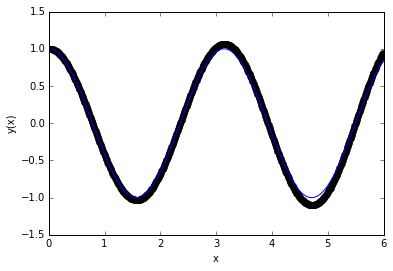

In [6]:
plot(x,y_1, 'ko')
plot(x,cos(2.0*x))
plt.xlabel('x')
plt.ylabel('y(x)')

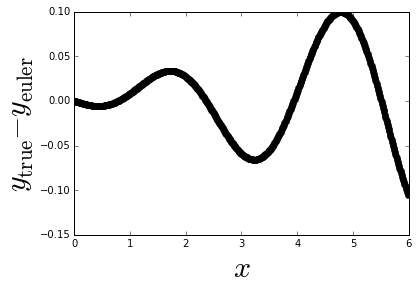

In [7]:
plot(x,cos(2.0*x)-y_1, 'ko')
plt.xlabel('$x$', size=30)
plt.ylabel('$y_{\mathrm{true}}-y_{\mathrm{euler}}$',size=30)

In [8]:
def func_prime_1(x, y_1, y_2):
    return y_2

def func_prime_2(x, y_1, y_2):
    return -4*y_1

def RungeKuttaSecondOrderStep(x_old, y_1_old, y_2_old):
    #get the first derivatives
    y_prime_1 = func_prime_1(x_old,y_1_old, y_2_old)
    y_prime_2 = func_prime_2(x_old,y_1_old, y_2_old)
    
    #from this estimation move to the middle point
    x_middle = x_old+ (h/2.0)
    y_1_middle = y_1_old + (h/2.0) * y_prime_1
    y_2_middle = y_2_old + (h/2.0) * y_prime_2 
    
    #compute the derivatives at the middle point
    y_middle_prime_1 = func_prime_1(x_middle, y_1_middle, y_2_middle)
    y_middle_prime_2 = func_prime_2(x_middle, y_1_middle, y_2_middle)
    
    x_new = x_old + h
    y_1_new = y_1_old + h * y_middle_prime_1 
    y_2_new= y_2_old + h * y_middle_prime_2
    return x_new, y_1_new, y_2_new

In [9]:
x[0]   = min_x
y_1[0] = 1.0
y_2[0] = 0.0    

for i in range(1,n_points):
    x[i],y_1[i],y_2[i] = RungeKuttaSecondOrderStep(x[i-1], y_1[i-1], y_2[i-1])

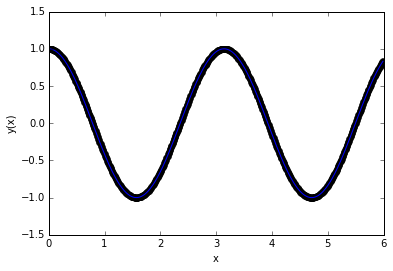

In [10]:
plot(x,y_1, 'ko')
plot(x,cos(2.0*x))
plt.xlabel('x')
plt.ylabel('y(x)')

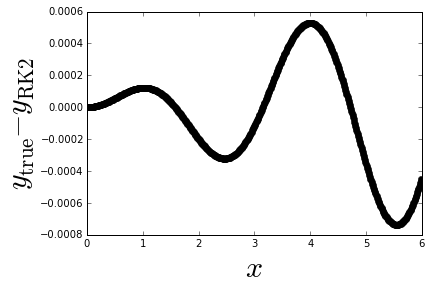

In [11]:
plot(x,cos(2.0*x)-y_1, 'ko')
plt.xlabel('$x$', size=30)
plt.ylabel('$y_{\mathrm{true}}-y_{\mathrm{RK2}}$',size=30)

In [12]:
def func_prime_1(x, y_1, y_2):
    return y_2

def func_prime_2(x, y_1, y_2):
    return -4*y_1

def RungeKuttaFourthOrderStep(x_old, y1_old, y2_old):
    
    k_1_prime1 = func_prime_1(x_old,y1_old, y2_old)
    k_1_prime2 = func_prime_2(x_old,y1_old, y2_old)
    
    #first step
    x1 = x_old+ (h/2.0)
    y1_1 = y1_old + (h/2.0) * k_1_prime1
    y2_1 = y2_old + (h/2.0) * k_1_prime2
    k_2_prime1 = func_prime_1(x1, y1_1, y2_1)
    k_2_prime2 = func_prime_2(x1, y1_1, y2_1)
    
    #second step
    x2 = x_old + (h/2.0)
    y1_2 = y1_old + (h/2.0) * k_2_prime1
    y2_2 = y2_old + (h/2.0) * k_2_prime2
    k_3_prime1 = func_prime_1(x2, y1_2, y2_2)
    k_3_prime2 = func_prime_2(x2, y1_2, y2_2)
    
    
    #third
    x3 = x_old + h
    y1_3 = y1_old + h * k_3_prime1
    y2_3 = y2_old + h * k_3_prime2
    k_4_prime1 = func_prime_1(x3, y1_3, y2_3)
    k_4_prime2 = func_prime_2(x3, y1_3, y2_3)
    
    #fourth step
    average_k_1 = (1.0/6.0)*(k_1_prime1 + 2.0*k_2_prime1 + 2.0*k_3_prime1 + k_4_prime1)
    average_k_2 = (1.0/6.0)*(k_1_prime2 + 2.0*k_2_prime2 + 2.0*k_3_prime2 + k_4_prime2)
    
    x_new = x_old + h
    y_1_new = y1_old + h * average_k_1
    y_2_new= y2_old + h * average_k_2
    return x_new, y_1_new, y_2_new

In [13]:
x[0]   = min_x
y_1[0] = 1.0
y_2[0] = 0.0    

for i in range(1,n_points):
    x[i],y_1[i],y_2[i] = RungeKuttaFourthOrderStep(x[i-1], y_1[i-1], y_2[i-1])

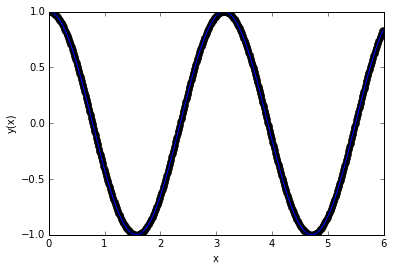

In [14]:
plot(x,y_1, 'ko')
plot(x,cos(2.0*x))
plt.xlabel('x')
plt.ylabel('y(x)')

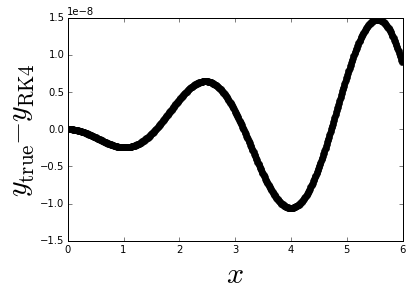

In [15]:
plot(x,cos(2.0*x)-y_1, 'ko')
plt.xlabel('$x$', size=30)
plt.ylabel('$y_{\mathrm{true}}-y_{\mathrm{RK4}}$',size=30)

# Exercises

* The equation of motion for a pendulum has the form:

    $$
    y^{\prime\prime} = -4.0\sin y
    $$

    Compute the solution with a fourth-order Runge-Kutta scheme for two sets of initial conditions: $y(0)=0.1$, $y^{\prime}=0.0$ and $y(0)=4.0$, $y^{\prime}=0.0$. In both cases compare the numerical solution against the analytical solution for $y^{\prime\prime} = -4.0y$ and the same set of initial conditions.

* Solve the following system of coupled ODEs

$$
\frac{dx}{dt} = \sigma(y-x)
$$

$$
\frac{dy}{dt} = x(\rho-z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

with $\sigma=10$, $\beta=8/3$ and $\rho=28$ with a 4th order Runge-Kutta in the time interval $0<t<3$. The intial conditions for $x$, $y$ and $z$ are random numbers between $-10$ and $10$.


Write the programs in C and the plotting routines in Python.
